In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.3MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**First let's unite Delhi, as it was Daredevils before**

In [10]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [11]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [12]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)


In [13]:
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's go on now -**
**RR V DC**

In [14]:
data_f = data2.loc[data2.team1.isin(['Rajasthan Royals', 'Delhi Capitals'])] 
data_f = data_f.loc[data_f.team2.isin(['Rajasthan Royals', 'Delhi Capitals'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
92,93,2008,Jaipur,2008-05-11,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Delhi Capitals,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
179,180,2010,Ahmedabad,2010-03-15,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,V Sehwag,"Sardar Patel Stadium, Motera",BG Jerling,RE Koertzen,NaN
202,203,2010,Delhi,2010-03-31,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Delhi Capitals,67,0,KD Karthik,Feroz Shah Kotla,HDPK Dharmasena,SJA Taufel,NaN
240,241,2011,Jaipur,2011-04-12,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
344,345,2012,Delhi,2012-04-29,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Delhi Capitals,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
348,349,2012,Jaipur,2012-05-01,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,6,P Negi,Sawai Mansingh Stadium,JD Cloete,SJA Taufel,NaN


Finally , We have got a complete dataset for all the matches of  RR V DC 

**Let's do Q1 now**

DC Wins - 9
RR Wins - 11


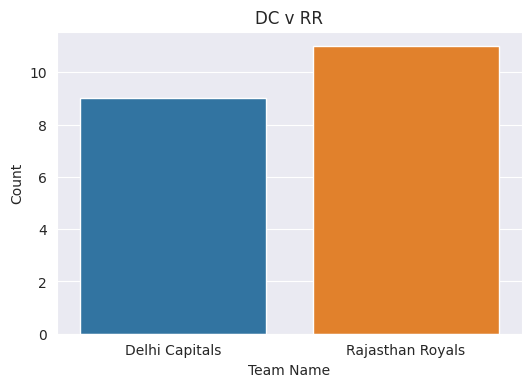

In [16]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Count')
plt.xlabel('Team Name')
plt.title('DC v RR')
A,B =data_f.winner.value_counts()

print('DC Wins -',B)
print('RR Wins -',A)

plt.show()


RR has a edge overall but once let's analyze the performance for last 2 seasons

In [17]:
data_f = data2.loc[data2.team1.isin(['Rajasthan Royals', 'Delhi Capitals'])] 
data_f = data_f.loc[data_f.team2.isin(['Rajasthan Royals', 'Delhi Capitals'])] 
data_f = data_f[data_f.season > 2017]
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
641,7899,2018,Jaipur,11/04/18,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,K Ananthapadmanabhan,Rod Tucker,Nitin Menon
667,7925,2018,Delhi,02/05/18,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,1,Delhi Capitals,4,0,RR Pant,Feroz Shah Kotla,O Nandan,Virender Kumar Sharma,Bruce Oxenford
735,11331,2019,Jaipur,22/04/19,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium,S Ravi,Nanda Kishore,Yeshwant Barde
748,11344,2019,Delhi,04/05/19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon


DC Wins - 3
RR Wins - 1


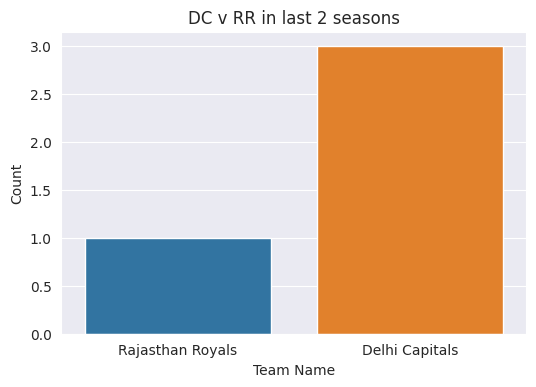

In [20]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Count')
plt.xlabel('Team Name')
plt.title('DC v RR in last 2 seasons')
A,B =data_f.winner.value_counts()

print('DC Wins -',A)
print('RR Wins -',B)

plt.show()

I will be marking DC on behalf of the recent performance .

Let's mark for DC.

**For Q2 I will be again checking the average Powerplay score of Delhi v RR from last 2 IPL's**

In [24]:
data_h = data.loc[data.batting_team.isin(['Delhi Capitals'])]
data_h = data_h.loc[data.bowling_team.isin(['Rajasthan Royals'])]
data_h = data_h[data_h.over <= 6]
data_h = data_h[data_h.match_id >=7899]
data_h


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151768,7899,2,Delhi Capitals,Rajasthan Royals,1,1,GJ Maxwell,C Munro,K Gowtham,0,0,0,0,0,0,0,0,0,C Munro,run out,K Gowtham
151769,7899,2,Delhi Capitals,Rajasthan Royals,1,2,GJ Maxwell,RR Pant,K Gowtham,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
151770,7899,2,Delhi Capitals,Rajasthan Royals,1,3,RR Pant,GJ Maxwell,K Gowtham,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
151771,7899,2,Delhi Capitals,Rajasthan Royals,1,4,RR Pant,GJ Maxwell,K Gowtham,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151772,7899,2,Delhi Capitals,Rajasthan Royals,1,5,RR Pant,GJ Maxwell,K Gowtham,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177326,11344,2,Delhi Capitals,Rajasthan Royals,6,2,SS Iyer,RR Pant,I Sodhi,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
177327,11344,2,Delhi Capitals,Rajasthan Royals,6,3,SS Iyer,RR Pant,I Sodhi,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
177328,11344,2,Delhi Capitals,Rajasthan Royals,6,4,SS Iyer,RR Pant,I Sodhi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
177329,11344,2,Delhi Capitals,Rajasthan Royals,6,5,SS Iyer,RR Pant,I Sodhi,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [25]:
data_h.total_runs.sum() # Sum of Powerplay scores in last 2 IPL's of DC v RR

234

In [26]:
data_h.match_id.nunique()  # Verifying matches , It must be 4

4

In [27]:
np.round(234/4,2) # Average PowerPlay scores by DC v RR in last 4 matches

58.5

Let's trust  DC's batting order and mark 51 + there.

**For Q3, Let's analyze Steve Smith's record v DC in last 4 matches**

In [34]:
data_s = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_s = data_s.loc[data.batting_team.isin(['Rajasthan Royals'])]
data_s = data_s.loc[data.batsman.isin(['SPD Smith'])]
data_s = data_s[data_s.match_id >=7899]
data_s

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
174224,11331,1,Rajasthan Royals,Delhi Capitals,3,4,SPD Smith,AM Rahane,AR Patel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174226,11331,1,Rajasthan Royals,Delhi Capitals,3,6,SPD Smith,AM Rahane,AR Patel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174227,11331,1,Rajasthan Royals,Delhi Capitals,4,1,SPD Smith,AM Rahane,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174228,11331,1,Rajasthan Royals,Delhi Capitals,4,2,SPD Smith,AM Rahane,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174229,11331,1,Rajasthan Royals,Delhi Capitals,4,3,SPD Smith,AM Rahane,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174230,11331,1,Rajasthan Royals,Delhi Capitals,4,4,SPD Smith,AM Rahane,I Sharma,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
174231,11331,1,Rajasthan Royals,Delhi Capitals,4,5,SPD Smith,AM Rahane,I Sharma,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN
174233,11331,1,Rajasthan Royals,Delhi Capitals,5,1,SPD Smith,AM Rahane,AR Patel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174238,11331,1,Rajasthan Royals,Delhi Capitals,5,6,SPD Smith,AM Rahane,AR Patel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174239,11331,1,Rajasthan Royals,Delhi Capitals,6,1,SPD Smith,AM Rahane,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [33]:
data_s.batsman.value_counts() 

AM Rahane        109
R Parag           56
JC Buttler        46
SV Samson         36
SPD Smith         33
D Short           28
BA Stokes         23
RA Tripathi       20
S Gopal           18
STR Binny         15
K Gowtham         14
L Livingstone     13
I Sodhi           12
VR Aaron           7
M Lomror           3
A Turner           1
Name: batsman, dtype: int64

In [35]:
data_s.batsman_runs.sum() # Smith total runs v DC in last 2 IPL

51

In [36]:
data_s.match_id.nunique() # Smith matches v DC in last 2 IPL

1

Well that doesn't gave us a reasonable opinion, let's find his overall record v DC

In [37]:
data_ss = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_ss = data_ss.loc[data.batsman.isin(['SPD Smith'])]
data_ss

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11976,51,2,Rising Pune Supergiant,Delhi Capitals,1,2,SPD Smith,RA Tripathi,Z Khan,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
11977,51,2,Rising Pune Supergiant,Delhi Capitals,1,3,SPD Smith,RA Tripathi,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11978,51,2,Rising Pune Supergiant,Delhi Capitals,1,4,SPD Smith,RA Tripathi,Z Khan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
11979,51,2,Rising Pune Supergiant,Delhi Capitals,1,5,SPD Smith,RA Tripathi,Z Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
11982,51,2,Rising Pune Supergiant,Delhi Capitals,2,1,SPD Smith,RA Tripathi,Mohammed Shami,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174282,11331,1,Rajasthan Royals,Delhi Capitals,12,7,SPD Smith,AM Rahane,S Rutherford,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174284,11331,1,Rajasthan Royals,Delhi Capitals,13,1,SPD Smith,AM Rahane,CH Morris,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
174288,11331,1,Rajasthan Royals,Delhi Capitals,13,5,SPD Smith,AM Rahane,CH Morris,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174289,11331,1,Rajasthan Royals,Delhi Capitals,13,6,SPD Smith,AM Rahane,CH Morris,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [38]:
data_ss.batsman_runs.sum() # Smith's runs v DC

150

In [39]:
data_ss.match_id.nunique() # Smith Matches v DC

5

In [40]:
data_ss.player_dismissed.value_counts() # To find average

SPD Smith    3
Name: player_dismissed, dtype: int64

In [42]:
np.round(150/3,2) # Smith's Average v DC

50.0

Well in both analysis he has performed well

Let's mark 40+ there

**Let's move on to Q4 now**

Let's find average wide in DC v RR contest in last 4 matches


In [56]:
data_w = data.loc[data.batting_team.isin(['Rajasthan Royals', 'Delhi Capitals'])] 
data_w= data_w.loc[data.bowling_team.isin(['Rajasthan Royals', 'Delhi Capitals'])] 
data_w = data_w[data_w.match_id >=7899]
data_w

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151659,7899,1,Rajasthan Royals,Delhi Capitals,1,1,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151660,7899,1,Rajasthan Royals,Delhi Capitals,1,2,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
151661,7899,1,Rajasthan Royals,Delhi Capitals,1,3,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151662,7899,1,Rajasthan Royals,Delhi Capitals,1,4,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151663,7899,1,Rajasthan Royals,Delhi Capitals,1,5,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177388,11344,2,Delhi Capitals,Rajasthan Royals,16,3,RR Pant,AR Patel,S Gopal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
177389,11344,2,Delhi Capitals,Rajasthan Royals,16,4,AR Patel,RR Pant,S Gopal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
177390,11344,2,Delhi Capitals,Rajasthan Royals,16,5,RR Pant,AR Patel,S Gopal,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
177391,11344,2,Delhi Capitals,Rajasthan Royals,16,6,RR Pant,AR Patel,S Gopal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [57]:
data_w.wide_runs.sum() # Total wide runs in last 4 matches

26

In [58]:
data_w.match_id.nunique() 

4

In [59]:
26/4 # Finding average wide runs in last 4 matches

6.5

Let's mark 6+ there.

**Let's do Q5 now**

**Finding average wickets lost by both teams in last 4 matches**

In [60]:
data_w.player_dismissed.value_counts().sum()  # Our desired datset for this problem

44

In [61]:
data_w.match_id.nunique()

4

In [63]:
np.round(44/4,2) # Average Wicket's loss in DC v RR in last 4 matches

11.0

Let's mark 11-15 there 

Thank You again for this amazing internship

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

